# Jaccard index computation between shape files
## Development version

This notebook illustrates the calculation of the Jaccard index between slums shape file and slighntly modified one denoting the municipality ground truth for the slums in Kalyan, India.

Python package imports

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import fiona
#import shapely.geometry as shgeom
from fiona import collection as ficol
from descartes import PolygonPatch

Paths and filenames

In [13]:
# data paths
TRUTH_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/original/"
TEST_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/test/"

# masks filename
slums_shape_fname = "slums_municipality.shp"
test_shape_fname1 = "slums_municipality_modified1.shp" # some slums are removed
test_shape_fname2 = "slums_municipality_modified2.shp" # for now copy os the truth shape file

# masks full filenames
truth_slums_shape_fullfname = os.path.join(TRUTH_SHAPE_PATH, slums_shape_fname)
test_slums_shape_fullfname1 = os.path.join(TEST_SHAPE_PATH, test_shape_fname1)
test_slums_shape_fullfname2 = os.path.join(TEST_SHAPE_PATH, test_shape_fname2)

print("Full truth shape filename: ", truth_slums_shape_fullfname)
print("Full test shape filename1: ", test_slums_shape_fullfname1)
print("Full test shape filename2: ", test_slums_shape_fullfname2)

Full truth shape filename:  /home/elena/DynaSlum/Data/Kalyan/original/slums_municipality.shp
Full test shape filename1:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified1.shp
Full test shape filename2:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified2.shp


Load data and display the bounds

In [18]:
fp = fiona.open(truth_slums_shape_fullfname)
bounds = fp.bounds
xmin, ymin, xmax, ymax = bounds
print("xmin: ", xmin, "xmax: ", xmax, "ymin: ", ymin, "ymax: ", ymax)
fp.close()

xmin:  297328.6765506615 xmax:  300732.35364115785 ymin:  2123671.144477916 ymax:  2127839.1117448886


Function to display a multipolygon from a shape file on a figure axis with with given color and extent

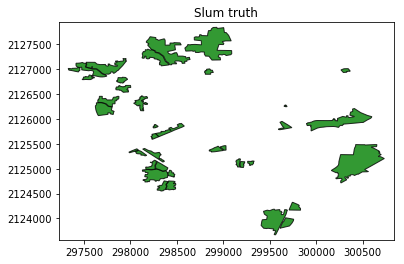

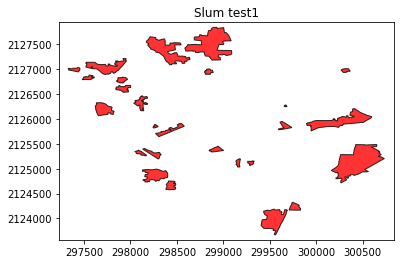

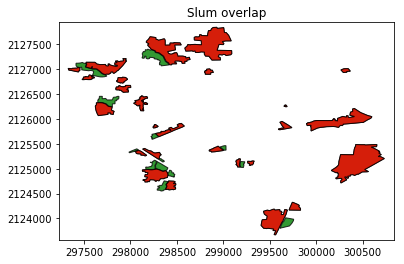

In [88]:
def show_multipolygon(filename, axis, extent, offset, color, alpha, title):
    xmin, ymin, xmax, ymax = extent
    
    with ficol(filename, "r") as input:
        for f in input:
            axis.add_patch(
            PolygonPatch(
                f['geometry'], fc=color, alpha=alpha ))
    axis.set_xlim(xmin - offset, xmax + offset) 
    axis.set_ylim(ymin - offset, ymax + offset)              
    axis.set_title(title)
    
    return axis

RED = '#FF0000'
GREEN = '#008000'
#BLUE = '#0000FF'
#GOLD = '#FFD700'
MAGENTA = '#FF00FF'
offset = 100
alpha = 0.8
alpha_over = 0.5

#fig = plt.figure()
#_, (( ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey=True)
_, ax1 = plt.subplots()
_, ax2 = plt.subplots()
_,ax3 = plt.subplots()
ax1 = show_multipolygon(truth_slums_shape_fullfname, ax1, bounds, 100, GREEN, alpha,'Slum truth')
ax2 = show_multipolygon(test_slums_shape_fullfname1, ax2, bounds, 100, RED, alpha,'Slum test1')
ax3 = show_multipolygon(truth_slums_shape_fullfname, ax3, bounds, 100, GREEN, alpha,'')
ax3 = show_multipolygon(test_slums_shape_fullfname1, ax3, bounds, 100, RED, alpha, 'Slum overlap')

plt.show();



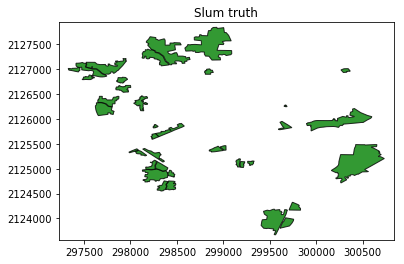

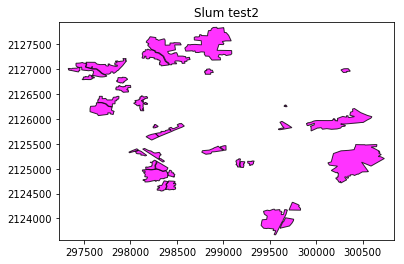

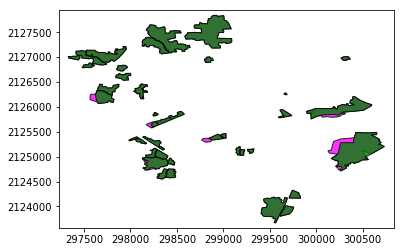

In [86]:
_, ax4 = plt.subplots()
_, ax5 = plt.subplots()
_,ax6 = plt.subplots()
ax4 = show_multipolygon(truth_slums_shape_fullfname, ax4, bounds, 100, GREEN, alpha,'Slum truth')
ax5 = show_multipolygon(test_slums_shape_fullfname2, ax5, bounds, 100, MAGENTA, alpha,'Slum test2')
ax6 = show_multipolygon(test_slums_shape_fullfname2, ax6, bounds, 100, MAGENTA, alpha, 'Slum overlap')
ax6 = show_multipolygon(truth_slums_shape_fullfname, ax6, bounds, 100, GREEN, alpha,'')

plt.show();